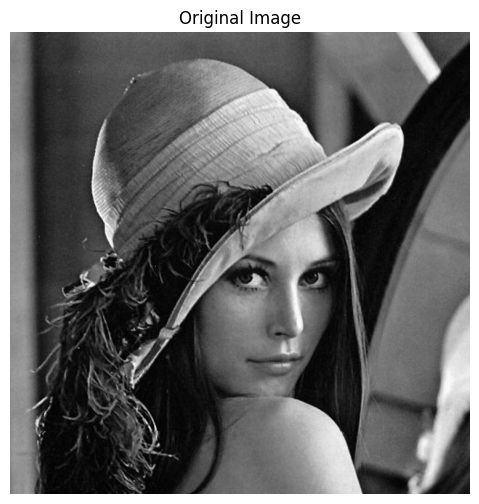

Image Size: 633x636, Channels: 3
Number of Pixels: 402588


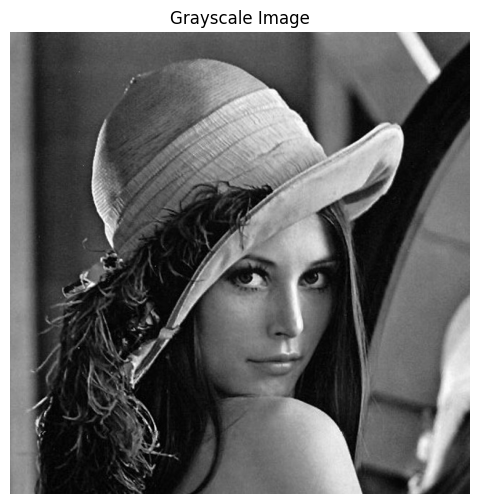

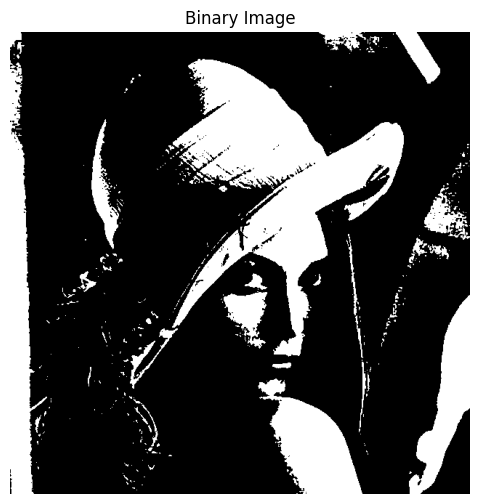

Black Pixel Count: 307383


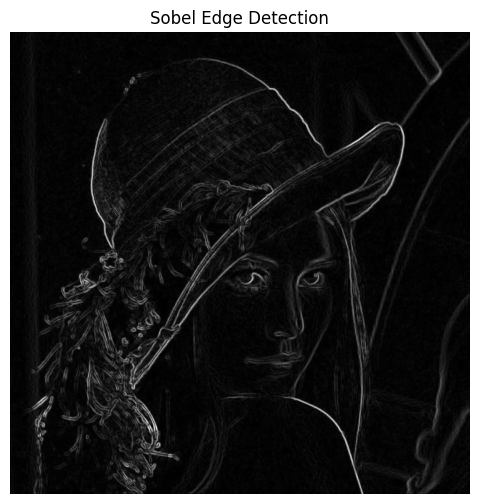

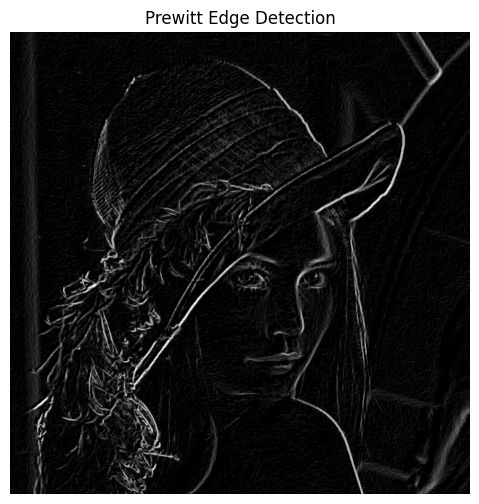

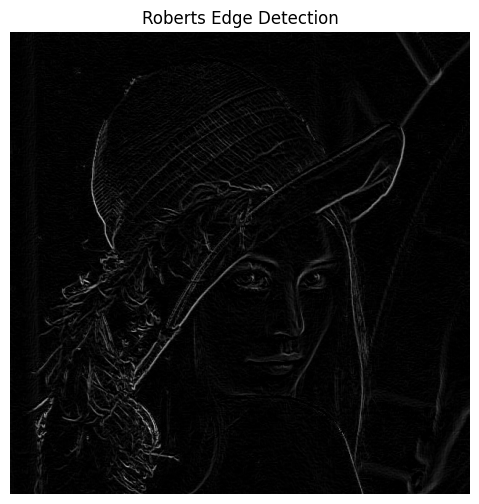

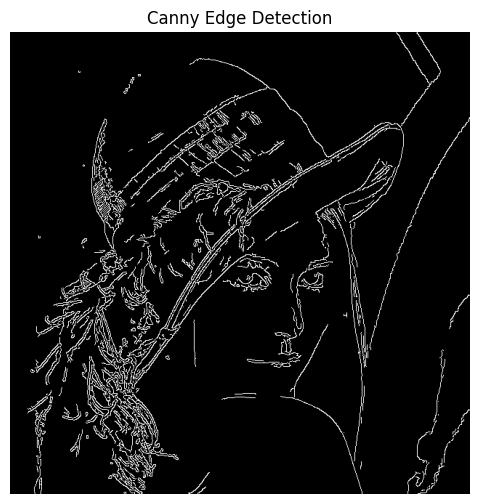

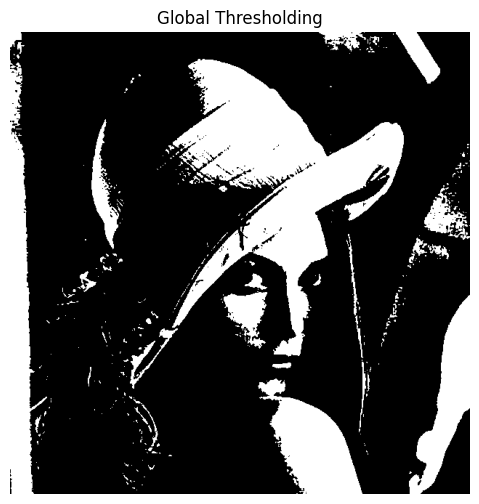

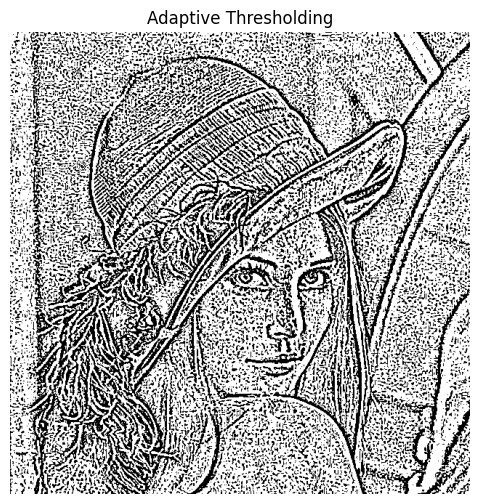

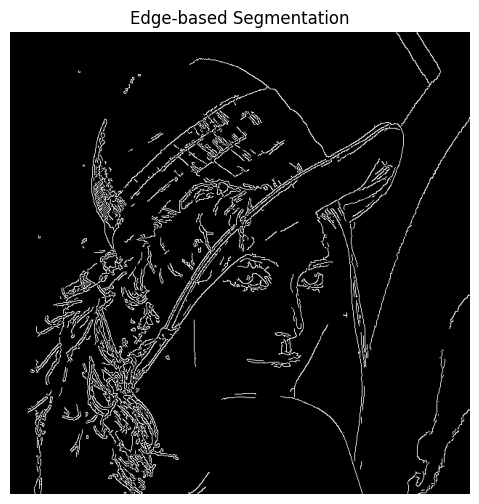

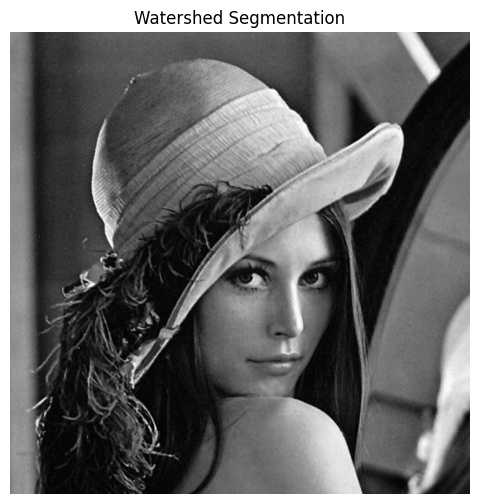

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(title, img, cmap=None):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Task 1: Image Manipulation
# 1. Read the image
image = cv2.imread('/content/cv_lab_image.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 2. Display the image
display_image('Original Image', image_rgb)

# 3. Extraction of Image size
height, width, channels = image.shape
print(f'Image Size: {width}x{height}, Channels: {channels}')

# 4. Calculation of image pixels
num_pixels = height * width
print(f'Number of Pixels: {num_pixels}')

# 5. Convert RGB to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_image('Grayscale Image', gray_image, cmap='gray')
cv2.imwrite('grayscale.jpg', gray_image)

# 6. Convert RGB to Binary using Thresholding
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
display_image('Binary Image', binary_image, cmap='gray')
cv2.imwrite('binary.jpg', binary_image)

# Counting black pixels
black_pixels = np.sum(binary_image == 0)
print(f'Black Pixel Count: {black_pixels}')

# Task 2: Edge Detection
# 1. Sobel Operator
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobel_x, sobel_y)
display_image('Sobel Edge Detection', sobel, cmap='gray')

# 2. Prewitt Operator
kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_x = cv2.filter2D(gray_image, -1, kernelx)
prewitt_y = cv2.filter2D(gray_image, -1, kernely)
prewitt = cv2.magnitude(prewitt_x.astype(np.float32), prewitt_y.astype(np.float32))
display_image('Prewitt Edge Detection', prewitt, cmap='gray')

# 3. Roberts Cross Operator
roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, 1], [-1, 0]])
roberts_x_img = cv2.filter2D(gray_image, -1, roberts_x)
roberts_y_img = cv2.filter2D(gray_image, -1, roberts_y)
roberts = cv2.magnitude(roberts_x_img.astype(np.float32), roberts_y_img.astype(np.float32))
display_image('Roberts Edge Detection', roberts, cmap='gray')

# 4. Canny Edge Detector
canny = cv2.Canny(gray_image, 100, 200)
display_image('Canny Edge Detection', canny, cmap='gray')

# Image Segmentation
# 1. Global Thresholding
_, global_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
display_image('Global Thresholding', global_thresh, cmap='gray')

# 2. Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
display_image('Adaptive Thresholding', adaptive_thresh, cmap='gray')

# 3. Edge-based Segmentation using Canny
display_image('Edge-based Segmentation', canny, cmap='gray')

# 4. Region-Based Segmentation using Watershed
gray_blur = cv2.GaussianBlur(gray_image, (5,5), 0)
ret, thresh = cv2.threshold(gray_blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]
display_image('Watershed Segmentation', image_rgb)